# Controls charts—average and range (XbarR)

# Document

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Control charts---average and range (XBarR)</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2018-10-18</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2017-09-03</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">control_charts_xbarr.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">xbarr.csv</td>
    </tr>
</table>

# In brevi
Shewhart control charts, also called process behaviour charts, are used to determine if the variation of a process is stable and predictable, that is, in a state of statistical control. In-control variation arises from chance or common causes. No changes or adjustments to the process are needed. The charts can be used to predict future performance. Out-of-control variation arises from special or assignable causes. These charts help identify the special causes in order minimize or eliminate their effect.

# Data

Download the [data file](https://drive.google.com/open?id=0BzrdQfHR2I5DdWpLOC1DSWltVzA). It consists of a "Sample" column and several "Xi" columns of floats or integers.

# Methodology
The charts presented here are the average and range control charts, also called XbarR. The data are collected using rational samples. The average values of each subgroup sample are plotted in time order. A central line (average) and control limits above and below the central line are plotted.

# Control chart formulae

## Average chart (X)

$$
    \begin{align}
        UCL_\overline{X}, LCL_\overline{X} & = \overline{\overline{X}} \pm 3 \times \text{Sigma(}\overline{X}\text{)} \\
                     & = \overline{\overline{X}} \pm 3 \times \frac{\text{Sigma(X) }}{\sqrt{n}} \\
                     & = \overline{\overline{X}} \pm \frac{3 \text{ }\overline{R}}{d_2 \sqrt{n}}
    \end{align}
$$

The constant $d_2$ can be found in tables of control chart constants.It is a rescaling constant that changes an average range to a standard deviation. The value of $d_2$ is a function of the subgroup size $n$.

## Range chart (R)

$$
    \begin{align}
        UCL_R, LCL_R & = \overline{R} \pm 3 \times \text{Sigma(R)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \text{Sigma(X)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_3$ can be found in tables of control chart constants. It is a rescaling constant that changes a a standard deviation of individual values to a standard deviation of range values. The value of $d_3$ is a function of subgroup size.

In [1]:
# Import the required libraries and modules.
import pandas as pd
import math
import datasense as ds
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Read the csv data file. It is encoded in UTF-8.
# The values to plot are in mupltiple columns X1, X2, ...
# Set "date" as the index, if there is a "date column".
#chart_data = pd.read_csv('xbarr.csv', parse_dates=True, \
#                          index_col='Date')
chart_data = pd.read_csv('xbarr.csv', index_col='Sample')

In [3]:
# Define for the Xbar chart the graph title and subtitle, and the x and y axis labels.
x_chart_title = 'Average Control Chart'
x_chart_subtitle = 'Thickness'
x_chart_ylabel = 'Thickness (mm)'
x_chart_xlabel = 'Sample'
subgroup_size = len(chart_data.columns)

In [4]:
# Determine d2 and d3 constants.
constants = pd.read_csv('control_chart_constants.csv')
d_two = constants['d2'][constants['n'] == subgroup_size].values[0]
d_three = constants['d3'][constants['n'] == subgroup_size].values[0]

In [5]:
# Define for the R chart the graph title and subtitle,
# and the x and y axis labels.
r_chart_title = 'Range Control Chart'
r_chart_subtitle = 'Thickness Range'
r_chart_ylabel = 'Thickness Range (mm)'
r_chart_xlabel = 'Sample'

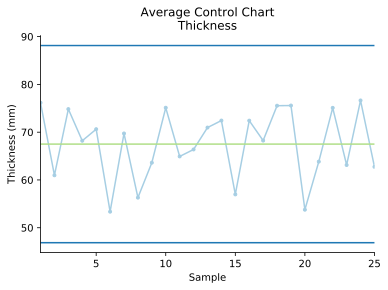

In [6]:
# Create the X control chart.
#x = ds.Xbar(chart_data.loc[:, 'X1':'X4']) # this works better for many columns
x = ds.Xbar(chart_data[['X1', 'X2', 'X3', 'X4']])
ax1 = x.ax
ax1.set_title(x_chart_title + '\n'+ x_chart_subtitle)
ax1.set_ylabel(x_chart_ylabel)
ax1.set_xlabel(x_chart_xlabel)
ax1.figure.savefig('xbar.svg', format='svg')

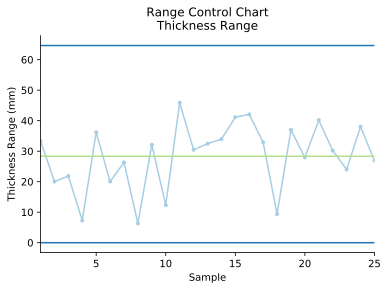

In [7]:
# Create the mR control chart.
#y = ds.Xbar(chart_data.loc[:, 'X1':'X4']) # this works better for many columns
y = ds.R(chart_data[['X1', 'X2', 'X3', 'X4']])
ax1 = y.ax
ax1.set_title(r_chart_title + '\n'+ r_chart_subtitle)
ax1.set_ylabel(r_chart_ylabel)
ax1.set_xlabel(r_chart_xlabel)
ax1.figure.savefig('r.svg', format='svg')

In [8]:
# R chart statistics
# Calculate average range
average_range = (chart_data.max(axis='columns') - 
                 chart_data.min(axis='columns')).mean()
# Calculate the range chart upper control limit.
range_chart_upper_control_limit = average_range + \
    3 * d_three * average_range / d_two
# Calculate the range chart lower control limit.
range_chart_lower_control_limit = average_range - \
    3 * d_three * average_range / d_two
# Set the moving range lower control limit to 0 if it is < 0.
if range_chart_lower_control_limit < 0:
    range_chart_lower_control_limit = 0.0

In [9]:
# Xbar chart statistics
# Calculate average of averages.
average_of_averages = (chart_data.mean(axis='columns')).mean()
# Calculate the averages chart upper control limit.
average_chart_upper_control_limit = average_of_averages + \
    3 * average_range / (d_two * math.sqrt(subgroup_size))
# Calculate the averages chart lower control limit.
average_chart_lower_control_limit = average_of_averages - \
    3 * average_range / (d_two * math.sqrt(subgroup_size))

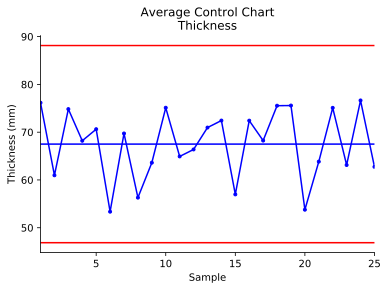

In [10]:
# Create a graph of "average values v. sample".
ax = chart_data.mean(axis='columns').plot.line(legend=False,
                                               marker='o',
                                               markersize=3,
                                               color='blue')
ax.axhline(y=average_of_averages, color='b')
ax.axhline(y=average_chart_upper_control_limit, color='r')
ax.axhline(y=average_chart_lower_control_limit, color='r')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
# Add the chart title and subtitle.
ax.set_title(x_chart_title + '\n' + x_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(x_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(x_chart_xlabel)
# Save the graph as svg and pdf.
ax.figure.savefig('xbar.svg', format='svg')
ax.figure.savefig('xbar.pdf', format='pdf')

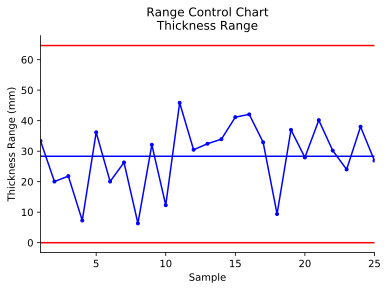

In [11]:
# Create a graph of "range values v. sample".
ax = (chart_data.max(axis='columns') - \
      chart_data.min(axis='columns')).plot.line(legend=False,
                                                marker='o',
                                                markersize=3,
                                                color='blue')
ax.axhline(y=average_range, color='b')
ax.axhline(y=range_chart_upper_control_limit, color='r')
ax.axhline(y=range_chart_lower_control_limit, color='r')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
# Add the chart title and subtitle.
ax.set_title(r_chart_title + '\n' + r_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(r_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(r_chart_xlabel)
# Save the graph as svg and pdf.
ax.figure.savefig('r.svg', format='svg')
ax.figure.savefig('r.pdf', format='pdf')

# Descriptive statistics

## Average control chart

In [12]:
print('Upper control limit',
      average_chart_upper_control_limit,
      sep=' = ')
print('Average',
      average_of_averages,
      sep=' = ')
print('Lower control limit',
      average_chart_lower_control_limit,
      sep=' = ')
print('Sigma(Xbar)',
      average_range / d_two / math.sqrt(subgroup_size),
      sep=' = ')

Upper control limit = 88.1384161998066
Average = 67.50312721517402
Lower control limit = 46.86783823054144
Sigma(Xbar) = 6.878429661544193


## Range control chart

In [13]:
print('Upper control limit',
      range_chart_upper_control_limit.round(3),
      sep=' = ')
print('Average moving range',
      average_range,
      sep=' = ')
print('Lower control limit',
      range_chart_lower_control_limit,
      sep=' = ')
print('Sigma(R)',
      average_range * d_three / d_two,
      sep=' = ')

Upper control limit = 64.635
Average moving range = 28.32537334623899
Lower control limit = 0.0
Sigma(R) = 12.103284832453163


# Interpretation

## Moving range control chart
The moving range chart measures the within-subroup variation. If the process is in statistical control (all rules met), the estimation of dispersion should be useful. This chart should be evaluated first because $\overline{R}$ is used in the control limits of the individuals chart.

## Averages control chart
The averages control chart measures the *location* of the process. Use the Shewhart detection rules in the order as follows.

### Detection rule one
If there are no out-of-control points, proceed to the next rule. If there are out-of-control points, fix the root causes.

In [14]:
# Find points greater than the upper control limit
chart_data.loc[((chart_data.mean(axis='columns') >
                 average_chart_upper_control_limit)), :]

,X1,X2,X3,X4
Sample,,,,


In [15]:
# Find points less than the upper control limit
chart_data.loc[((chart_data.mean(axis='columns') <
                 average_chart_lower_control_limit)), :]

,X1,X2,X3,X4
Sample,,,,


### Detection rule four
### Detection rule two
### Detection rule three

#  Development

- Add text for Shewhart's or Nelson's Rules; define the rules
- How do I determine T or F for each rule; loc or iloc
- Code for rule 1

# References

Wheeler, Donald J. 1995. *Advanced Topics in Statistical Process Control*. Knoxville, TN: SPC Press, Inc.